# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing
import string
# from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Embedding, Dropout, GlobalAveragePooling1D, LSTM

# Download Model
import pickle

# Reading Data

In [2]:
data = pd.read_csv(r"D:\Courses language programming\11_Natural Language Processing\Projects For NLP\Data\NLP - Arabic 100k Reviews\ar_reviews_100k.tsv", sep="\t")
data.head(5)

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


In [3]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [4]:
data["label"].value_counts()

Positive    33333
Mixed       33333
Negative    33333
Name: label, dtype: int64

In [5]:
data[data["label"] == "Mixed"]

,label,text
33333,Mixed,مقبول. السرير مريح نوعا ما. حمام واحد فقط ف ال...
33334,Mixed,أول قراءة لي لغادة السمان، الكاتبة أوضحت أن مح...
33335,Mixed,رواية جيدة مختلفة عن النوع الذى عودنا احمد مرا...
33336,Mixed,جميلة وممتعة ، بس مش مهمة خالص. اول حاجة اقراه...
33337,Mixed,الثلاث نجمات لي أنا وليس للكتاب.. لأني ببساطة ...
...,...,...
66661,Mixed,هنا غازي .. مختلف. ماهر في في أخذك للوكيشن الم...
66662,Mixed,أكثر ما أحبتته هو اعتماده علي وصف التاريخ من و...
66663,Mixed,اقامه جيده بشكل عام . القرب من الحرم المكيالمص...
66664,Mixed,كان الكتاب كتاب جميل أشبع رغبتنا لمعرفة أوجه ث...


In [6]:
# data = pd.concat([data.iloc[0:10000],data.iloc[33333:10000+33333], data.iloc[33333+33333:10000+33333+33333]], axis=0)
# data.head(4)

In [7]:
# data["label"].value_counts()

In [8]:
data.drop(data[data["label"] == "Mixed"].index, axis=0, inplace=True)

In [9]:
data.head(5)

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


# Data Preprocessing

In [10]:
punc = list(string.punctuation)

def preprocessing(data):
    data = " ".join([word for word in word_tokenize(data) if word not in punc])
    return data

In [11]:
data["text"] = data["text"].apply(preprocessing)

In [12]:
data.head(5)

,label,text
0,Positive,ممتاز نوعا ما النظافة والموقع والتجهيز والشاطي...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية تنقلك من صخب شوارع القاهرة الى ...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ا...


In [13]:
data.loc[data["label"] == "Positive", "label"] = 0
data.loc[data["label"] == "Negative", "label"] = 1
# data.loc[data["label"] == "Mixed", "label"] = 2

In [14]:
data.head()

,label,text
0,0,ممتاز نوعا ما النظافة والموقع والتجهيز والشاطي...
1,0,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,0,هادفة .. وقوية تنقلك من صخب شوارع القاهرة الى ...
3,0,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,0,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ا...


# Shuffle Data

In [15]:
np.random.shuffle(data.values)

In [16]:
X = data["text"]
Y = data["label"]

In [17]:
data.head(5)

,label,text
0,1,كتاب ممل للغاية لدرجة إنى ماقدرتش أكمله
1,1,يشفع له قربه من الحرم لم يعجبني شي سوا موقعه و...
2,1,أقدر جهود الكاتب الصحفية التي بدت واضحة وجلية ...
3,1,في تسويق النظام الاشتراكي المرأة مثالا
4,1,عموما الرواية كويسة بس انا حسيت انى تائهه الرب...


# Tokenization

In [18]:
tokenize = Tokenizer()
tokenize.fit_on_texts(X)

sequances = tokenize.texts_to_sequences(X)
max_len = max([len(sent) for sent in sequances])
pad_seq = pad_sequences(sequances, maxlen=max_len, truncating="pre", padding="pre")

word_index = tokenize.word_index
word_length = len(word_index) + 1
print("The Max Length of Sentience is --> ", max_len)
print("The Length of Words is --> ", word_length)

The Max Length of Sentience is -->  1616
The Length of Words is -->  270282


In [19]:
len(pad_seq), word_length, max_len

(66666, 270282, 1616)

# Transform Labels From Encoder to OHE

In [20]:
labels = to_categorical(Y, 2)
labels[1:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Splitting Data To Training & Testing

In [21]:
x_train, x_test, y_train, y_test = train_test_split(pad_seq, labels, train_size=0.7, random_state=42)

In [22]:
y_train[0]

array([0., 1.], dtype=float32)

# Building Model

In [23]:
model = k.models.Sequential([
    Embedding(word_length, 200, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1616, 200)         54056400  
                                                                 
 global_average_pooling1d (G  (None, 200)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 54,082,386
Trainable params: 54,082,386
Non-trainable params: 0
____________________________________________

In [24]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1459/1459 [==============================] - 61s 41ms/step - loss: 0.6491 - accuracy: 0.5779 - val_loss: 0.4778 - val_accuracy: 0.7588
Epoch 2/10
1459/1459 [==============================] - 60s 41ms/step - loss: 0.3635 - accuracy: 0.8394 - val_loss: 0.3800 - val_accuracy: 0.8234
Epoch 3/10
1459/1459 [==============================] - 60s 41ms/step - loss: 0.2630 - accuracy: 0.8892 - val_loss: 0.3490 - val_accuracy: 0.8492
Epoch 4/10
1459/1459 [==============================] - 60s 41ms/step - loss: 0.2083 - accuracy: 0.9158 - val_loss: 0.4400 - val_accuracy: 0.8223
Epoch 5/10
1459/1459 [==============================] - 60s 41ms/step - loss: 0.1742 - accuracy: 0.9308 - val_loss: 0.4407 - val_accuracy: 0.8339
Epoch 6/10
1459/1459 [==============================] - 60s 41ms/step - loss: 0.1434 - accuracy: 0.9462 - val_loss: 0.4356 - val_accuracy: 0.8443
Epoch 7/10
1459/1459 [==============================] - 61s 42ms/step - loss: 0.1199 - accuracy: 0.9552 - val_loss: 0.4716 -

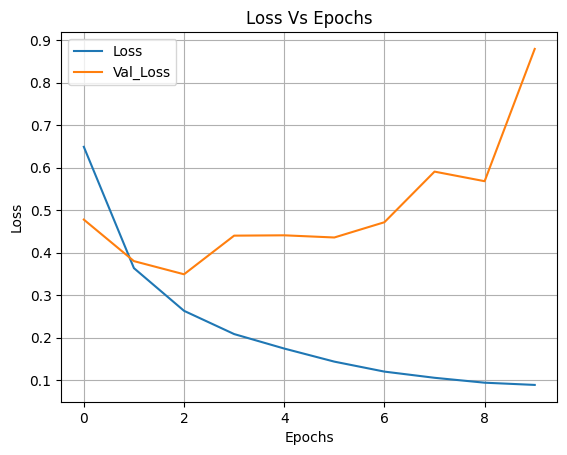

In [25]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

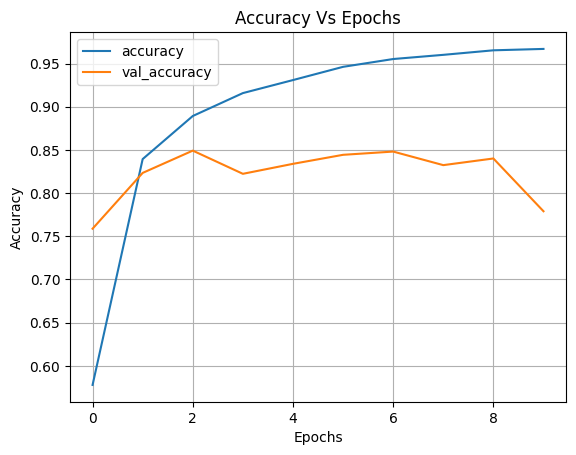

In [26]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Download Model

In [27]:
pickle.dump(model, open(r"D:\Pycharm\model_pickle\NLP - Models\Arabic-sentiement-Analysis.bin", "wb"))

INFO:tensorflow:Assets written to: ram://e1a238bf-a5e4-4672-8f36-3fb71a9a652e/assets


# System

In [39]:
sentence = input()

for i in punc:
    if i in sentence:sentence = sentence.replace(i, "")
        
new_seq = tokenize.texts_to_sequences([sentence])
new_pad_seq = pad_sequences(new_seq, maxlen=max_len)

if np.argmax(model.predict(new_pad_seq)) == 0: print("The Good")
else: print("THe Bad")

المنتج سئ جدا وخرا
1/1 [==============================] - 0s 15ms/step
The Good
